In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('../data/input/train.csv', parse_dates=['fecha_dato'])

In [3]:
cnt_user = train['fecha_dato'].value_counts()

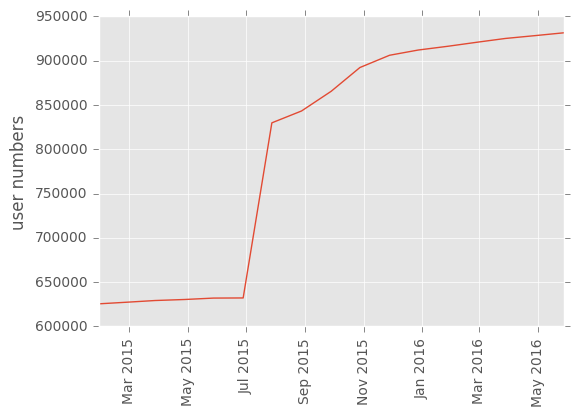

In [4]:
plt.plot(cnt_user)
plt.xticks(rotation=90)
plt.ylabel('user numbers')
plt.show()

In [5]:
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1'] 

In [6]:
cnt_pro = train.groupby('fecha_dato')[target_cols].sum()

In [7]:
cnt_pro

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,88,19,487855,301,58763,7757,8418,106471,36195,1513,...,5007,7430,2349,38288,35613,20263,3234,38995,43331,95601
2015-02-28,89,20,488658,301,60028,7690,8228,106043,36040,2055,...,4998,7407,2344,38507,34352,20198,3219,40746,44810,94543
2015-03-28,89,21,489074,315,60929,7674,7875,105688,35847,2396,...,4988,7384,2340,38727,34990,20020,3196,42967,44109,97211
2015-04-28,87,21,489069,313,62221,7653,7482,105167,35650,2439,...,4968,7370,2346,39603,35988,19939,3173,42443,46593,98312
2015-05-28,85,21,489737,313,63391,7647,7096,104947,35499,2075,...,4797,7363,2342,39946,35880,19955,3155,41383,42458,96487
2015-06-28,83,21,494027,316,59845,7596,6920,104602,35342,1803,...,4721,7363,2040,42888,36550,19675,3138,43524,47703,98655
2015-07-28,82,19,503903,320,61607,7582,6939,104288,35145,1845,...,4707,7345,2024,41779,37159,19699,3128,44937,49589,99981
2015-08-28,82,19,514827,323,62997,7556,6993,104053,35010,1909,...,4693,7346,2023,42021,36820,19949,3108,42788,47060,96045
2015-09-28,81,19,529608,319,63759,7521,7180,103680,34795,1982,...,4682,7343,2024,42267,36248,20155,3090,43673,47998,100726


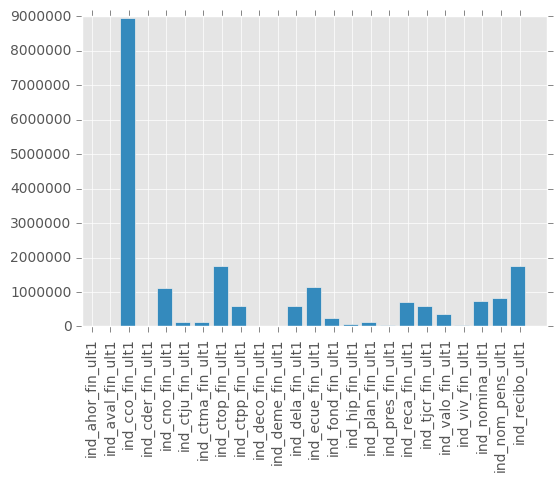

In [8]:
plt.bar(np.arange(24), train[target_cols].sum())
plt.xticks(np.arange(24) + 0.5, target_cols, rotation=90)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 47 columns):
fecha_dato               datetime64[ns]
ncodpers                 int64
ind_empleado             int64
pais_residencia          int64
sexo                     int64
age                      int64
fecha_alta               int64
ind_nuevo                int64
antiguedad               int64
indrel                   int64
ult_fec_cli_1t           int64
indrel_1mes              int64
tiprel_1mes              int64
indresi                  int64
indext                   int64
conyuemp                 int64
canal_entrada            int64
indfall                  int64
tipodom                  int64
cod_prov                 int64
ind_actividad_cliente    int64
renta                    float64
segmento                 int64
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1        int64
ind_cno_fin_ult1         int64
ind_ct

In [10]:
train[train['renta']!= -1].groupby('cod_prov')['renta'].median()

cod_prov
-1     137860.11
 1      96967.65
 2      78657.30
 3      67526.28
 4      73390.65
 5      68561.28
 6      62330.97
 7     123573.51
 8     131214.48
 9      89385.09
 10     67799.49
 11     79016.37
 12     66630.30
 13     62193.45
 14     69106.89
 15     97689.30
 16     67201.41
 17    108963.21
 18     82447.02
 19     92724.66
 20     80599.14
 21     68994.30
 22     73467.81
 23     67886.40
 24     80901.54
 25     64818.45
 26     89936.28
 27     64390.53
 28    139070.97
 29     95102.61
 30     67813.86
 31     86649.27
 32     79069.62
 33     87199.38
 34     86593.08
 35     80948.61
 36     97829.10
 37     89831.25
 38     82729.23
 39     95517.60
 40     89311.56
 41     92710.35
 42     78810.90
 43     88283.46
 44     76467.57
 45     68867.76
 46     72988.98
 47     92880.39
 48     99978.78
 49     74692.71
 50     99950.28
 51    128699.58
 52    117408.66
Name: renta, dtype: float64

In [11]:
train[train['renta']!= -1].groupby('cod_prov')['renta'].mean()

cod_prov
-1     187906.323606
 1     111098.148000
 2      83064.848288
 3      87357.524678
 4      85400.890251
 5      76853.644825
 6      72179.259325
 7     171996.711631
 8     164679.725496
 9      97881.713048
 10     75365.837118
 11     98639.454034
 12     79182.404427
 13     69888.344398
 14     85610.098884
 15    112801.433133
 16     69963.822931
 17    144280.058276
 18     96550.105363
 19     95555.565901
 20    141895.856104
 21     76679.978057
 22     89228.517244
 23     77142.962740
 24     93382.590714
 25     81211.486994
 26     99658.075047
 27     76686.762131
 28    178898.530555
 29    121216.290417
 30     79084.932726
 31    102476.178621
 32     83307.511023
 33    101403.745175
 34     92760.757439
 35    100331.555016
 36    113531.583223
 37    105810.994095
 38    102752.474573
 39    121201.130074
 40     98463.742094
 41    117427.365866
 42     88064.107845
 43    104581.804129
 44     87655.776155
 45     80624.424583
 46     89799.892794
 47 

In [12]:
train[train['renta']!= -1]['renta'].mean()

134254.3182381411

In [13]:
train[train['renta']!= -1]['renta'].describe()

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64

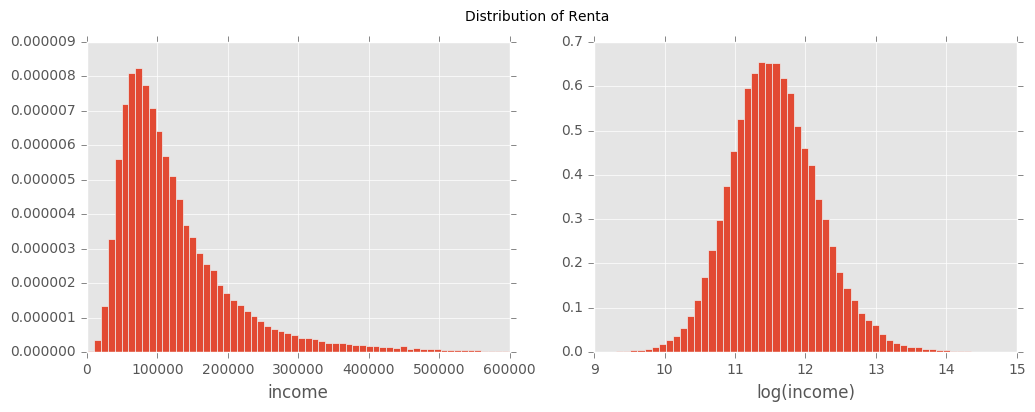

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
fig.suptitle('Distribution of Renta')
train[train['renta']!= -1]['renta'].hist(bins=3000, normed=1, ax=ax1)
ax1.set_xlim(0, 600000)
ax1.set_xlabel('income')
np.log(train[train['renta']!= -1]['renta']).hist(bins=100, normed=1,ax=ax2)
ax2.set_xlim(9, 15)
ax2.set_xlabel('log(income)')
plt.show()

(0, 110)

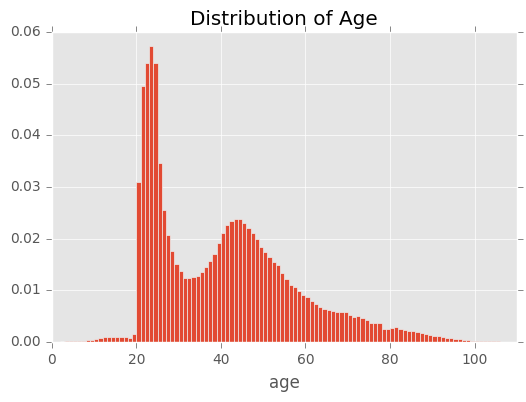

In [16]:
train[train['age'] != -1]['age'].hist(bins=162, normed=1)
plt.xlabel('age')
plt.title('Distribution of Age')
plt.xlim(0, 110)

In [17]:
train[train['age'] != -1]['age'].describe()

count    1.361958e+07
mean     4.018146e+01
std      1.718509e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.900000e+01
75%      5.000000e+01
max      1.640000e+02
Name: age, dtype: float64

In [18]:
train[train['antiguedad']!= -1].groupby('cod_prov')['antiguedad'].mean()

cod_prov
-1     129.108356
 1      88.257506
 2      49.853787
 3      64.698957
 4      66.540694
 5      61.250754
 6      47.147910
 7      75.178232
 8      80.118718
 9      65.194551
 10     46.601192
 11     61.673416
 12     56.735088
 13     55.178357
 14     61.642028
 15     53.299412
 16     49.335160
 17     63.443858
 18     62.734731
 19     82.863660
 20     94.744365
 21     48.731075
 22     66.407780
 23     72.437363
 24     71.600593
 25     59.442720
 26     75.651687
 27     48.129999
 28     96.428830
 29     67.117845
 30     40.808604
 31     90.809666
 32     46.042995
 33     65.835296
 34     56.808510
 35     66.073933
 36     51.059262
 37     53.356623
 38     84.948512
 39     74.464337
 40     70.842304
 41     70.519750
 42     73.468177
 43     71.346372
 44     52.806792
 45     63.038997
 46     71.118043
 47     65.988962
 48    105.160021
 49     49.208553
 50     81.049620
 51     84.933222
 52    108.993763
Name: antiguedad, dtype: float64

In [19]:
train[train['antiguedad']!= -1].groupby('cod_prov')['antiguedad'].count()

cod_prov
-1       65857
 1       37704
 2      114128
 3      313397
 4       60291
 5       38783
 6      192996
 7      124933
 8     1275219
 9       97188
 10     129912
 11     294684
 12     104295
 13     119390
 14     144679
 15     429322
 16      57310
 17      90538
 18     178562
 19      64618
 20      71567
 21     122283
 22      40181
 23      64363
 24      83003
 25      79059
 26      85202
 27      84962
 28    4409600
 29     367023
 30     396759
 31      88618
 32      84009
 33     265749
 34      49282
 35     235700
 36     280026
 37     164238
 38      70968
 39     155706
 40      42341
 41     605164
 42      17660
 43     100115
 44      22525
 45     183067
 46     682304
 47     238259
 48     185888
 49      50927
 50     342543
 51       7218
 52       9460
Name: antiguedad, dtype: int64

In [20]:
train[train['antiguedad']!= -1]['antiguedad'].describe()

count    1.361958e+07
mean     7.659194e+01
std      1.671807e+03
min     -9.999990e+05
25%      2.300000e+01
50%      5.000000e+01
75%      1.350000e+02
max      2.560000e+02
Name: antiguedad, dtype: float64

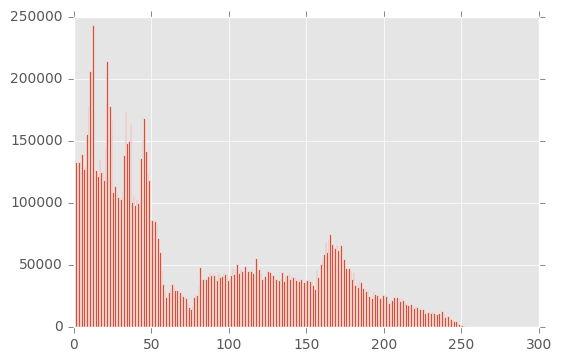

In [24]:
train[(train['antiguedad']>=0)]['antiguedad'].hist(bins=256)

In [22]:
train[train['antiguedad']<0]['antiguedad'].value_counts()

-1         27734
-999999       38
Name: antiguedad, dtype: int64

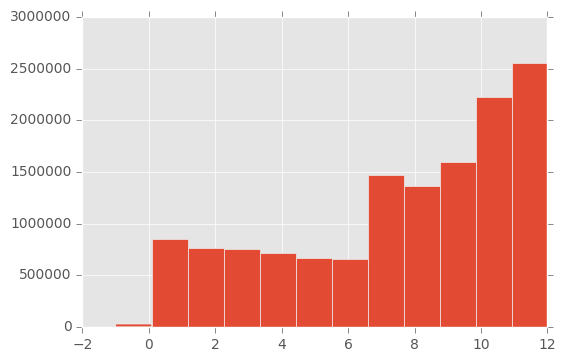

In [23]:
train['fecha_alta'].hist(bins=12)